# Simple Linear Regression Analysis on Marketing Campaigns

## Introduction

In this project, I will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, I will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

I would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in the company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

## Step 1: Imports

### Import packages

In [19]:
# Import packages.

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols 


### Load the dataset

In [21]:
# RUN THIS CELL TO IMPORT THE DATA. 

data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.

data.head(10)

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


## Step 2: Data exploration

### Familiarizing with the data's features

Starting with an exploratory data analysis to familiarize with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, I'll construct a simple linear regression model that predicts sales using a single independent variable. 

**Some reasons for conducting an EDA before constructing a simple linear regression model**

- Understand which variables are presented in the data.

- Understanding the distribution of features, like the minimum, mean,and maximum values.

- Plotting the relationship between the dependent variable and the independent variables to visualize which feature is the best choice for X.

- Identifying the issues within the data like the errors or the missing values.


### Exploring the data size

In [27]:
# Display the shape of the data as a tuple (rows, columns).

print(data.shape)
data.info()

(4572, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


### Exploring the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, I will use `describe()` to generate descriptive statistics for these three variables.

In [30]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV','Radio','Social_Media']].describe(include='all')

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Exploring the dependent variable

Before fitting the model, I'll ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Displaying the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [33]:
# Calculate the average missing rate in the sales column.
missing_sales_rate=data['Sales'].isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.
missing_sales_rate=round(missing_sales_rate*100, 2)

# Display the results (missing_sales must be converted to a string to be concatenated in the print statement).
print('Percentage of promotions missing Sales: ' +  str(missing_sales_rate) + '%')

Percentage of promotions missing Sales: 0.13%


- The preceding output shows that 0.13% of rows are missing the Sales value.

### Removing the missing data

In [36]:
# Subset the data to include rows where Sales is present.

data=data.dropna(subset=['Sales'],axis=0)

### Visualizing the sales distribution

Creating a histogram to visualize the distribution of `Sales`.

Text(0.5, 1.0, 'The Distribution of sales')

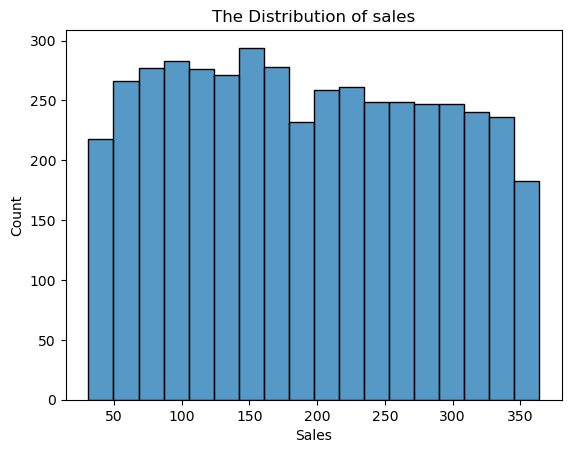

In [39]:
# Create a histogram of the Sales.
sns.histplot(data['Sales'])
plt.title('The Distribution of sales')


- The distibution is evenly distributed between 25 and 350 million. 

## Step 3: Model building

Creating a pairplot to visualize the relationships between pairs of variables in the data. I will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help selecting the X variable for the simple linear regression.

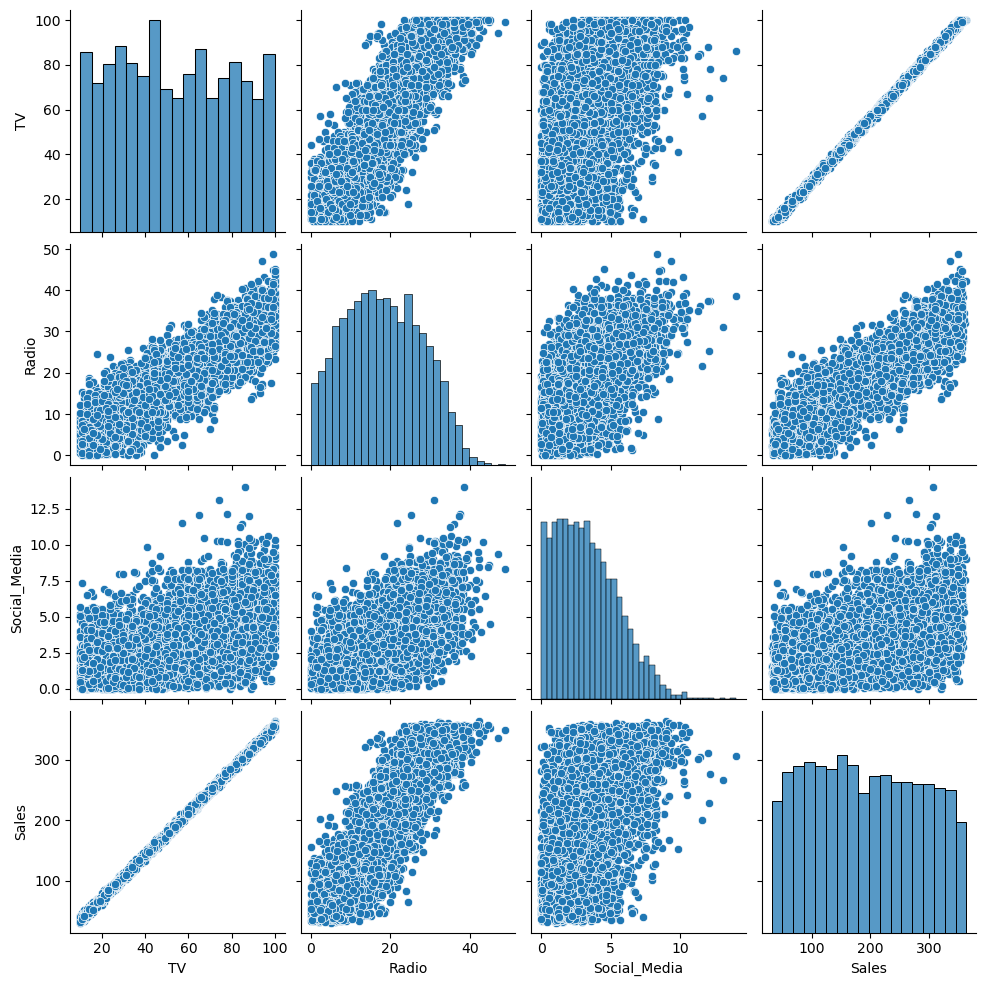

In [43]:
# Create a pairplot of the data.

sns.pairplot(data)

- I will choose TV promotions as the independent variable X because it exhibits a more obvious linear relationship with sales compared to radio promotions, which display a larger variance.

### Build and fit the model

In [54]:
# Define the OLS formula.

ols_formula='Sales~TV'

#Getting a subste of the data that i'm intersting in constructing a linear regression model for it['TV','Sales'].
ols_data=data[['TV','Sales']]
ols_data.head(10)
# Create an OLS model.
ols_model=ols(formula=ols_formula, data=ols_data)
              
# Fit the model.
model= ols_model.fit()
              
# Save the results summary.
model_summary=model.summary()
              
# Display the model results.
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:42:21   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

### Checking model assumptions

To justify using simple linear regression, I'll check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. I'll check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

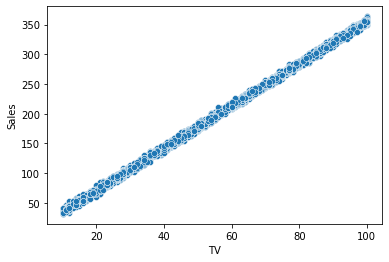

In [34]:
# Create a scatterplot comparing X and Sales (Y).

sns.scatterplot(x=data['TV'], y=data['Sales'])
plt.show()

- The linearity assumption is met, It's an obvious linear relationship between TV promotions and the sales.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

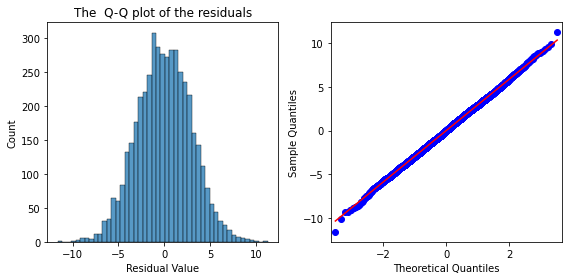

In [38]:
# Calculate the residuals.

residuals= model.resid
# Create a 1x2 plot figures.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

sns.histplot(residuals,ax=axes[0])
# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title('The distribution of the residuals')

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax=axes[1])
# Set the title of the Q-Q plot.
axes[0].set_title('The  Q-Q plot of the residuals')

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()


plt.show()

- The residuals closely follow a normal distribution as evidenced by the histogram and Q-Q plot, confirming the assumption of normality in the model.



### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

I'll check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Adding a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

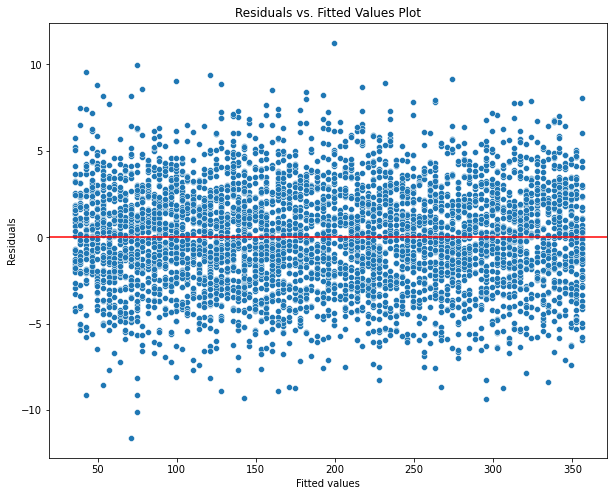

In [47]:
# Create a scatterplot with the fitted values from the model and the residuals.
fitted_values=model.predict(ols_data['TV'])
plt.figure(figsize=(10,8))

fig=sns.scatterplot(x=fitted_values, y= residuals)
# Set the x-axis label.
fig.set_xlabel('Fitted values')
# Set the y-axis label.
fig.set_ylabel('Residuals')
# Set the title.
plt.title("Residuals vs. Fitted Values Plot")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0).set_color('red')

plt.show()

- The scatterplot of fitted values versus residuals does not exhibit any discernible pattern. Therefore, we can conclude that the variance of the residuals is constant, indicating that the homoscedasticity assumption is satisfied.

## Step 4: Results and evaluation

### Displaying the OLS regression results

In [48]:
# Display the model_results defined previously.

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:14:14   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.2

**Note:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X).


- TV promotions explains 99.9% of the variation in the sales.

### Interpreting the model results

With the model fit evaluated, I'll assess the coefficient estimates and the uncertainty of these estimates.

- The slope is `3.5614`, which means that for every `million` dollars spent on TV promotions, the sales increase by `3.5614` million dollars.

- Sales = -0.1263 + 3.561* TV promotions

Beta coefficients allow us to estimate the magnitude and direction (positive or negative) of the effect of each independent variable on the dependent variable. The coefficient estimates can be converted to explainable insights, such as the connection between an increase in TV promotional budgets and sales mentioned previously.

### Measuring the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

In [49]:
# Display the model_results defined previously.

model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:14:14   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Since the p-value is 0, which is smaller than the standard significance level of 5%, we reject the null hypothesis. This indicates that the probability of observing such a relationship when the null hypothesis is true is effectively 0%. Therefore, the linear relationship we observed between TV promotions and sales is statistically significant.


- A 95% confidence interval of [3.558, 3.565] means we are 95% confident that this interval contains the true parameter value of the slope. This result indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.

**Recommendations to the leadership of the organization:**

Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result [3.558, 3.565] million dollars more in sales. This is a very confident estimate, as the p-value for this coefficient estimate is small and the confidence about the interval we provided is 95%. Thus, the business should prioritize increasing the TV promotional budget over the radio and social media promotional budgets to increase sales. 

## Conclusion

# Key Insights to Share

1. **Sales Distribution**: Sales are relatively evenly distributed between **\$25 million and \$350 million** across all promotional channels, indicating that sales outcomes cover a wide range in this dataset.

2. **Relationship Between Promotions and Sales**:
   - **TV has the strongest linear relationship** with sales, showing a clear and tight correlation.
   - **Radio** also shows a **moderate linear relationship** with sales but has more variance in comparison to TV.
   - **Social media** exhibits a **weak linear relationship** with sales, suggesting its lesser impact compared to TV and radio.

3. **R-Squared of the Model**:
   - When TV is used as the independent variable in a simple linear regression model, the **R-squared value is 0.999**, meaning that **99.9% of the variation in sales is explained by the TV promotional budget**. This shows that TV spending is an excellent predictor of sales.

4. **Model Coefficients**:
   - The model's **intercept is -0.1263**, implying that when no money is spent on TV promotions, the estimated sales would be slightly negative, at -\$0.1263 million. Although this value isn't realistic, it indicates the critical importance of TV spending for generating positive sales outcomes.
   - The **coefficient for TV promotions is 3.5614**, which means that **for every additional \$1 million spent on TV advertising, sales increase by an estimated \$3.5614 million**.

5. **Significance of the TV Coefficient**:
   - The slope for the TV coefficient has a **p-value of 0.000**, indicating strong statistical significance.
   - The **95% confidence interval** for the TV coefficient is **[3.558, 3.565]**, providing high confidence that the true value lies within this narrow range.

## Summary for Stakeholders:
- TV advertising is the **most effective channel** for driving sales, explaining almost all the variability in sales outcomes.

- For every \$1\$$ million increase in TV spending,

   sales are expected to rise by about \$ 3.56\$$  million.


- We are **95% confident** that the true increase in sales per 1\$ million spent on TV promotions falls within a **range of \$ 3.558\$ to \$ 3.565 million**.

- The model's results are statistically robust, with a high R-squared value and significant coefficients, making TV promotions a key focus for maximizing sales growth.



#### **References**
Saragih, H.S. (2020). [*Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).